In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
data = pd.read_table('../data/HENON.DAT')

In [3]:
data.shape

(16383, 1)

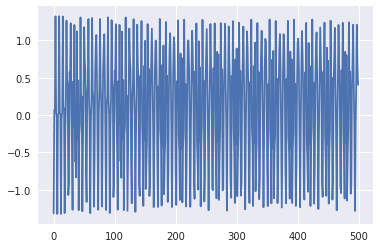

In [4]:
plt.plot(data[0:500])

In [ ]:
plt.hist(data, bins=10)

In [5]:
t = 3
data = np.array(data).flatten()
x = data[0:-t]
y = data[t:]

(array([[  0.,   0.,   0., ...,  36.,  61., 153.],
        [  0.,   0.,   0., ...,  22.,  31.,  47.],
        [  0.,   0.,   0., ...,  10.,  33.,  39.],
        ...,
        [ 32.,  22.,  26., ...,   0.,   0.,   0.],
        [ 67.,  30.,  37., ...,   0.,   0.,   0.],
        [153.,  50.,  36., ...,   0.,   0.,   0.]]),
 array([-1.32287553e+00, -1.30220561e+00, -1.28153568e+00, -1.26086575e+00,
        -1.24019582e+00, -1.21952589e+00, -1.19885597e+00, -1.17818604e+00,
        -1.15751611e+00, -1.13684618e+00, -1.11617625e+00, -1.09550633e+00,
        -1.07483640e+00, -1.05416647e+00, -1.03349654e+00, -1.01282661e+00,
        -9.92156685e-01, -9.71486757e-01, -9.50816829e-01, -9.30146901e-01,
        -9.09476973e-01, -8.88807045e-01, -8.68137117e-01, -8.47467189e-01,
        -8.26797261e-01, -8.06127333e-01, -7.85457405e-01, -7.64787477e-01,
        -7.44117549e-01, -7.23447621e-01, -7.02777693e-01, -6.82107765e-01,
        -6.61437837e-01, -6.40767909e-01, -6.20097981e-01, -5.99428052e

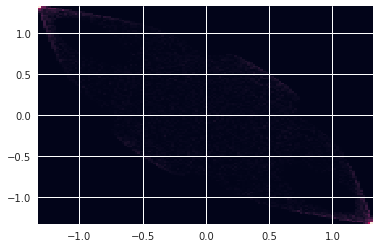

In [6]:
plt.hist2d(x, y, 128)

In [7]:
# 0~100でDelayを発生させて平均相互情報量(AMI)を求める
ami_list = []
t_list = []
bins = 101

for t in range(0, bins):
    ami = 0
    
    # handling delay data
    if (t == 0):
        unlagged = data
        lagged = data
    elif (t != 0):
        unlagged = data[:-t]
        lagged = np.roll(data, -t)[:-t]
    
    # create histgram
    if (len(unlagged) != len(lagged)):
        print('shape error')
        break
    else:
        N = len(unlagged)
        counts_a, edges_a = np.histogram(unlagged, bins=bins)
        counts_b, edges_b = np.histogram(lagged, bins=bins)
        counts_ab, xedges, yedges = np.histogram2d(unlagged, lagged, bins=bins)
    
    # bin_indices = np.digitize(a, edges)
    # discrete = a[bin_indices] # mode
    
    # calc AMI
    for i in range(0, bins):
        p_a = counts_a[i] / N

        for j in range(0, bins):
            p_b = counts_b[j] / N
            p_ab = counts_ab[i][j] / N
            
            if (p_a != 0) & (p_b != 0) & (p_ab != 0):
                ami += p_ab * (np.log2(p_ab / (p_a * p_b)))
    
    print('T=', t, ':',ami)            
    ami_list.append(ami)
    t_list.append(t)

T= 0 : 6.538739726257588
T= 1 : 1.2613902771631922
T= 2 : 1.16038412348566
T= 3 : 1.8242261955824584
T= 4 : 1.0879224453174101
T= 5 : 1.1274072647387114
T= 6 : 1.4798073184543739
T= 7 : 1.0188677958331134
T= 8 : 0.9806795768234433
T= 9 : 1.3207844478988664
T= 10 : 1.1513690313269522
T= 11 : 0.9786064322593653
T= 12 : 1.2453258932547806
T= 13 : 1.0751168930916528
T= 14 : 0.9239718877744543
T= 15 : 1.2233588199745677
T= 16 : 0.9494195890782066
T= 17 : 0.8645730719508471
T= 18 : 1.203364663299445
T= 19 : 0.7784117951057186
T= 20 : 0.8530141132347935
T= 21 : 1.1119756085649912
T= 22 : 0.7751086235379762
T= 23 : 0.8168279924710262
T= 24 : 1.0349140868580997
T= 25 : 0.7533815674293567
T= 26 : 0.7718745743565615
T= 27 : 0.933858390597116
T= 28 : 0.7588300704525565
T= 29 : 0.7083592305505283
T= 30 : 1.0566278707767462
T= 31 : 0.7229557875760184
T= 32 : 0.6932944128608305
T= 33 : 0.8989706082905486
T= 34 : 0.6597537865175618
T= 35 : 0.7263281111941439
T= 36 : 0.889147192319597
T= 37 : 0.6476064

Text(0,0.5,'I(T)')

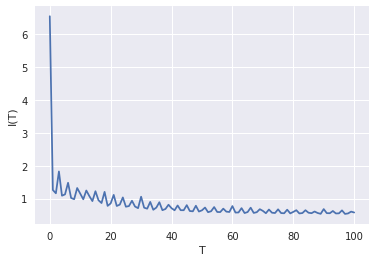

In [8]:
plt.plot(t_list, ami_list)
plt.xlabel('T')
plt.ylabel('I(T)')

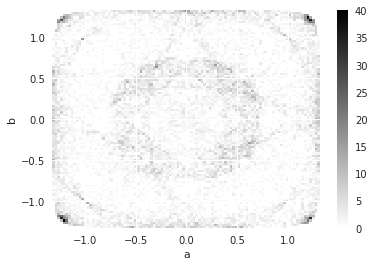

In [9]:
plt.hist2d(data[:-17], np.roll(data, -17)[:-17], bins=bins, cmap=plt.cm.binary)
plt.colorbar()
plt.xlabel('a')
plt.ylabel('b')
plt.show()

/home/tatsuki/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


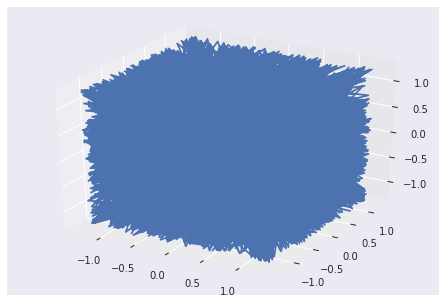

In [10]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pylab

figure = pylab.figure()
axes = Axes3D(figure)

data_lag0 = data[:-2].flatten()
data_lag1 = np.roll(data, -t)[:-2].flatten()
data_lag2 = np.roll(data, -2 * t)[:-2].flatten()
axes.plot3D(data_lag0, data_lag1, data_lag2)
figure.add_axes(axes)

pylab.show()